# Lecture 6: Matrix rank, singular value decomposition

## Syllabus
**Week 1:** Matrices, vectors, matrix/vector norms, scalar products & unitary matrices  
**Week 2:** TAs-week (Strassen, FFT, a bit of SVD)  
**Week 3:** Matrix ranks, singular value decomposition, linear systems  


## Recap of the previous lecture (a week ago)
- Concept of block matrices (Lecture 3.1)
- Matrix norms, scalar products, unitary matrices (Lecture 3.2)

## Today lecture
Today we will talk about:
- Rank of the matrix, idea of linear dependence
- Singular value decomposition (SVD) and low-rank approximation

## Matrix and linear spaces
A matrix can be considered as a sequence of vectors, its columns:
$$
   A = [a_1, \ldots, a_m], 
$$
where $a_m \in \mathbb{C}^n$.  
A matrix-by-vector product is equivalent to taking a linear combination of those columns  
$$
   y =  Ax, \quad \Longleftrightarrow y = a_1 x_1 + a_2 x_2 + \ldots +a_m x_m.
$$

This is a special case of **block matrix notation** that we have already seen.

## Linear dependence
The vectors are called linearly dependent, if there exist non-zero coefficients $x_i$ such that  
$$\sum_i a_i x_i = 0,$$
or in the matrix form,
$$
   Ax = 0, \quad \Vert x \Vert \ne 0.
$$
In this case, we say that the matrix $A$ has a non-trivial **nullspace**.

## Dimension of a linear space
A **linear space** is defined as all possible vectors of the form 
$$
   \sum_{i=1}^m a_i x_i, 
$$
where $x_i$ are some coefficients and $a_i, i = 1, \ldots, m$ are given vectors. In the matrix form, the linear space is a collection of the vectors of the form  
$$A x.$$
This set is also called the **range** of the matrix.


## Matrix rank
What is a matrix rank?  

A matrix rank is defined as the maximal number of linearly independent columns in a matrix, or the **dimension of its column space**.  

You can also use linear combination of rows to define the rank.  

** Theorem**  
The dimension of the column space of the matrix is equal to the dimension of the row space of the matrix.

## Are there any "small-dimensional subspaces"?

- Of course, not! (I.e. a random matrix is a full-rank matrices). 

Why do we care? 

## In practice, everything is "small-dimensional"

**Johnson–Lindenstrauss lemma** 

Given $0 < \epsilon < 1$, a set of points in $\mathbb{R}^N$ and $n > \frac{8 \log m}{\epsilon^2}$

and linear map $f$ from $\mathbb{R}^N \rightarrow \mathbb{R}^M$

$$(1 - \epsilon) \Vert u - v \Vert^2 \leq \Vert f(u) - f(v) \Vert^2 \leq (1 + \epsilon) \Vert u - v \Vert^2.$$

## Skeleton decomposition
A very useful representation for computation of the matrix rank is the **skeleton decomposition**, which can be graphically represented as follows:  
<img src="cross-pic.png">
or in the matrix form
$$
   A = U \widehat{A}^{-1} V^{\top},
$$
where $U$ are some $r$ columns of $A$, $V^{\top}$ are some rows of $A$, $\widehat{A}$ is the submatrix on the intersection, which should be **nonsingular**.

**Remark.**  
An inverse of the matrix $P$ the matrix $Q = P^{-1}$ such that  
$ P Q = QP = I$.  
If the matrix is square and has full rank (i.e. equal to $n$) then the inverse exists.

## Proof for the skeleton decomposition
Let $U$ be the $r$ columns based on the submatrix $\widehat{A}$. Then they are linearly independent. Take any other column $u$ of $A$. Then it is a linear combination of the columns of $U$, i.e.  
$u = U x$.  
These are $n$ equations. We take $r$ of those corresponding to the rows that contain $\widehat{A}$ and get the equation  
$$\widehat{u} = \widehat{A} x,$$  therefore  
$$x = \widehat{A}^{-1} \widehat{u},$$ and that gives us the result.

## A closer look
Any rank-$r$ matrix can be written in the form
$$A = U \widehat{A}^{-1} V^{\top},$$
where $U$ is $n \times r$, $V$ is $m \times r$ and $\widehat{A}$ is $r \times r$, or 
$$
   A = U' V'^{\top}.
$$
So, every rank-$r$ matrix can be written as a product of a "tall" matrix $U'$ by a long matrix $V'$. 

In the index form, it is  
$$
   a_{ij} = \sum_{\alpha=1}^r u_{i \alpha} v_{j \alpha}.
$$
For rank 1 we have
$$
   a_{ij} = u_i v_j,
$$
i.e. it is a separation of indices and rank-$r$ is a sum of rank-$1$ matrices!

### Storage
It is interesting to note, that for the rank-$r$ matrix 
$$A = U V^{\top}$$
only $U$ and $V$ can be stored, which gives us $(n+m) r$ parameters, so it can be used for compression. We can also compute matrix-by-vector product much faster.

In [2]:
import numpy as np
n = 1000
r = 10
u = np.random.randn(n, r)
v = np.random.randn(n, r)
a = u.dot(v.T)
x = np.random.randn(n)
%timeit a.dot(x)
%timeit u.dot(v.T.dot(x))

1000 loops, best of 3: 718 µs per loop
The slowest run took 4.99 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 9.85 µs per loop


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


We can also try to compute the matrix rank using the built-in ```np.linalg.matrix_rank``` function

In [26]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print 'Rank of the matrix:', np.linalg.matrix_rank(a)
b = a + 1e-6 * np.random.randn(n, n)
print 'Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-8)


Rank of the matrix: 1
Rank of the matrix: 50


### Instability of the matrix rank
For any rank-$r$ matrix $A$ with $r < \min(m, n)$ there is a matrix $B$ such that its rank rank is equal to $\min(m, n)$ and
$$
 \Vert A - B \Vert = \varepsilon.
$$
So, does this mean that numerically matrix rank has no meaning? (I.e., small perturbations lead to full rank)!  
The solution is to compute the best **rank-r** approximation to a matrix.

## Singular value decomposition
To compute low-rank approximation, we need to compute **singular value decomposition**.

**Theorem** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  
$$
   A = U \Sigma V^*,
$$
where $U$ is an $n \times K$ unitary matrix, $V$ is an $m \times K$ unitary matrix, $K = \min(m, n)$, <br> $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_K$ on the diagonal. <br>
Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_K = 0$.

*Proof:*
* Matrix is $A^*A$ Hermitian, hence diagonalizable in unitary basis (will be discussed further in the course).
* $A^*A>0$ (positive definite), so eigenvalues are positive.
Therefore, there exists unitary $V = [v_1, \dots, v_n]$ such that

$$
    V^* A^* A V = \text{diag}(\sigma_1^2,\dots, \sigma_n^2), \quad \sigma_1\geq \sigma_2\geq \dots \geq \sigma_n.
$$

Let $\sigma_i = 0$ for $i>r$, where $r$ is some integer. <br>
Let $V_r= [v_1, \dots, v_r]$, $\Sigma_r = \text{diag}(\sigma_1, \dots,\sigma_r)$. Hence

$$
    V^*_r A^* A V_r = \Sigma_r^2 \quad \Longrightarrow \quad (\Sigma_r^{-1} V_r^* A^*) (A V_r\Sigma_r^{-1} ) = I.
$$

As a result matrix $U_r = A V_r\Sigma_r^{-1}$ satisfies $U_r^* U_r = I$ and hence has orthogonal columns. <br>
Adding any orthogonal columns that are orthogonal to columns in $U_r$ and denoting this matrix as $U$ we arrive at

$$
    AV = U \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix}\quad \Longrightarrow \quad U^* A V = \begin{bmatrix}\Sigma_r & 0 \\ 0 & 0 \end{bmatrix}.
$$

Since multiplication by non-singular matrices does not change rank of $A$, we have $r = \text{rank}(A)$.

**Corollary 1**: $A = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_\alpha v_\alpha^*$ or elementwise $a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} \overline{v}_{\alpha i}$

**Corollary 2**: $$\text{ker}(A) = \text{span}\{v_{r+1},\dots,v_n\}$$
$$\text{im}(A) = \text{span}\{u_{1},\dots,u_r\}$$
$$\text{ker}(A^*) = \text{span}\{u_{r+1},\dots,u_n\}$$
$$\text{im}(A^*) = \text{span}\{v_{1},\dots,v_r\}$$

# Eckart-Young theorem

**Theorem:** Let $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Then

$$
    \min_{\text{rank}(B)=r} = \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}.
$$

The same holds for $\|\cdot\|_F$.

*Proof:* Since $\text{rank} (B) = r$, it holds $\text{dim}\, \text{ker} B = n-r$. <br>
Hence there exists $z\not=0$ such that $z\in \text{ker}(B) \cap \text{span}(v_1,\dots,v_{r+1})$ (as $\text{dim}\{v_1,\dots,v_{r+1}\} = r+1$).
Fix $\|z\| = 1$. Therefore,
$$
    \|A-B\|_2^2 \geq \|(A-B)z\|_2^2 = \|Az\|_2^2 = \sum_{i=1}^{n} \sigma_i (v_i^*z)^2 =\sum_{i=1}^{r+1} \sigma_i (v_i^*z)^2 \geq \sigma_{r+1}^2.\quad \blacksquare
$$

Computation of the best rank-$r$ approximation is equivalent to setting $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. The error is then determined by the omitted singular value!  
$$
   \min_{A_r} \Vert A - A_r \Vert = \sigma_{r+1},
$$
that is why it is important to look at the decay of the singular values.

## Low-rank approximation via SVD
$\Vert A - A_r \Vert = \Vert U \Sigma V^* - A_r \Vert = \Vert \Sigma - U^* A_r V \Vert$,  
where we used that for spectral norm (and for the Frobenius as well) we have  

$$\Vert X Q \Vert = \Vert X \Vert$$
for any unitary $Q$ and  any matrix $X$. This is called **unitary invariance** of the spectral norm (and Frobenius as well).  
What is left is to note that the best rank-$r$ approximation of the diagonal matrix is its subdiagonal.  

Computing the SVD is tricky; we will talk about the algorithms hidden in this computation later. But we already can do this in Python!

In [1]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print 'Rank of the matrix:', np.linalg.matrix_rank(a)
b = a + 1e-5 * np.random.randn(n, n)
print 'Rank of the matrix:', np.linalg.matrix_rank(b)

Rank of the matrix: 1
Rank of the matrix: 50


In [6]:
u, s, v = np.linalg.svd(b)
print s[1]/s[0]
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print np.linalg.norm(b - a1, 2)/s[0]

2.62173054286e-06
2.62173054287e-06


We can use SVD to compute approximations of **function-related** matrices, i.e. the matrices of the form 
$$a_{ij} = f(x_i, y_j),$$
where $f$ is a certain function, and $x_i, \quad i = 1, \ldots, n$ and $y_j, \quad j = 1, \ldots, m$ are some **one-dimensional grids**.

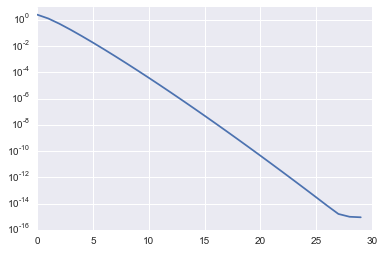

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
n = 1000
a = [[1.0/(i+j+1) for i in xrange(n)] for j in xrange(n)] #Hilbert matrix 
a = np.array(a)
u, s, v = np.linalg.svd(a)
fig, ax = plt.subplots(1, 1)
ax.semilogy(s[:30])
#We have very good low-rank approximation of it!

Now we can do something more interesting, like function approximation

3.61306034376e-10


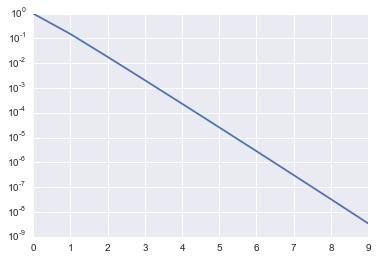

In [15]:
import numpy as np
n = 128
t = np.linspace(0, 5, n)
x, y = np.meshgrid(t, t)
f = 1.0 / (x + y + 0.5)
u, s, v = np.linalg.svd(f, full_matrices=False)
r = 10
u = u[:, :r]
s = s[:r]
v = v[:r, :] #Mind the transpose here!
fappr = u.dot(np.diag(s).dot(v))
er = np.linalg.norm(fappr - f, 'fro') / np.linalg.norm(f, 'fro')
print er
plt.semilogy(s/s[0])

And do some 3D plotting

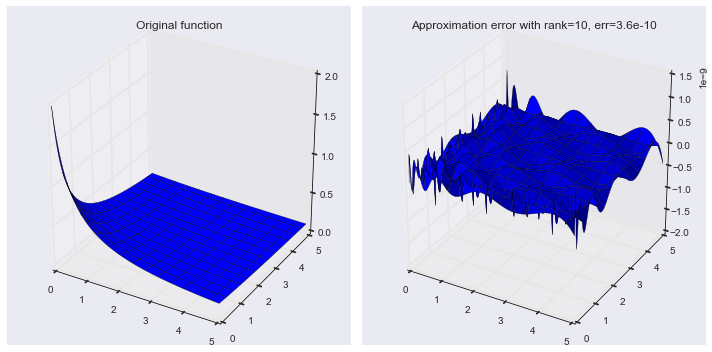

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, f)
ax.set_title('Original function')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, fappr - f)
ax.set_title('Approximation error with rank=%d, err=%3.1e' % (r, er))
fig.subplots_adjust()
fig.tight_layout()

## Linear factor analysis & low-rank
Consider a linear factor model, 

$$y = Ax, $$ where $y$ is a vector of length $n$, and $x$ is a vector of length $r$.  
The data is organizes as samples: we observe vectors  
$$y_1, \ldots, y_T,$$
then the factor model can be written as  
$$
  Y = AX,
$$
where $Y$ is $n \times T$, $A$ is $n \times r$ and $X$ is $r \times T$. This is exactly a rank-$r$ model: it tells us that the vector lie in a small subspace!  
We also can use SVD to recover this subspace (but not the independent components). Principal component analysis can be done by SVD!

## Take home message
- Matrix rank definition
- Skeleton approximation and dyadic representation of a rank-$r$ matrix
- Singular value decomposition

## Next lecture
- Linear systems
- Inverse matrix
- Condition number
- Linear least squares
- Pseudoinverse

##### Questions?

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()